How to recover deeply discharged car battery with CTEK MXS 5.0? The battery has been drained for more than an year and the voltage is below 3V

# My experience in recovering a car battery

The question: How to recover 12V car accumulator drained to below 3V? 

The case: A new 12V lead-acid car battery (accumulator) has self-discharged to 2.4V. The battery has not been used for more than an year.

Available equipment: CTEK MXS 5.0

Excellent for maintaining and recovering moderately discharged batteries. No manual override — won’t start if battery is very flat (<2V). Great for regular use and keeping healthy batteries in top shape.

![CTEK MXS 5.0 battery charger](CTEK_MXS_5.jpg) 

## Initial attempt

So I started charging the battery, following the instructions and selecting "Car" and "Recond" modes.

![battery](battery.jpg)


Unfortunately at normal mode charging stops at stage 5. According to the user manual this means that the battery cannot keep charge.

Charging at step 3 STEP 3 BULK (Charging with maximum current until approximately 80% battery capacity) was very short and at STEP 4 (ABSORPTION, BATTERY READY TO USE) it took about an hour. Than charging stopde at stage 5 (battery cannot keep charge)

The procedure was repeated several times by pressing the red button. No success.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [31]:
time = ['13:18', '13:40', '14:00', '14:26', '15:00','16:45', '18:45', '21:50', '24:30']
datetime = ['2025-05-05 '+t for t in time]
datetime[-1]='2025-05-06 00:30'
datetime = [np.datetime64(x) for x in datetime] 

voltage = [8.12, 13.8, 10.9, 10.18, 9.75, 8.88, 8.41, 8.00, 7.8]

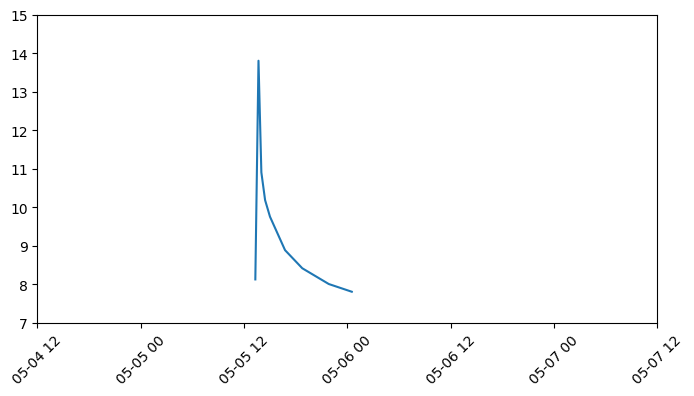

In [40]:
plt.figure(figsize=[8,4])
plt.plot(datetime, voltage)
plt.ylim(7, 15)
plt.xlim([np.datetime64(x) for x in ['2025-05-04 12:00', '2025-05-07 12:00']])
plt.xticks(rotation = 45);

## The solution

Charging the regular car battery (50–100Ah) using the CTEK MXS 5.0 in Small Battery mode (motorcycle symbol) actually worked. Charging stopped after 6 hours at Step 2 and the red light was on.

Analysis: Small Battery Mode is designed for smaller batteries — typically 1.2Ah to 14Ah. It uses a lower charging current (0.8A) compared to the normal car mode (5A). As there is a time limit for each charging step and charging a regular car battery (63Ah in this case) at 0.8A will take a very long time, the battery can't be fully charged if it’s deeply discharged.

The procedure: 


- Charging in Small Battery Mode was repeated several times each with duration about 6h. Finally the charger managed to get through all steps. 

- Charging in Car Battery Mode was started and completed sucessfully after a few more hours

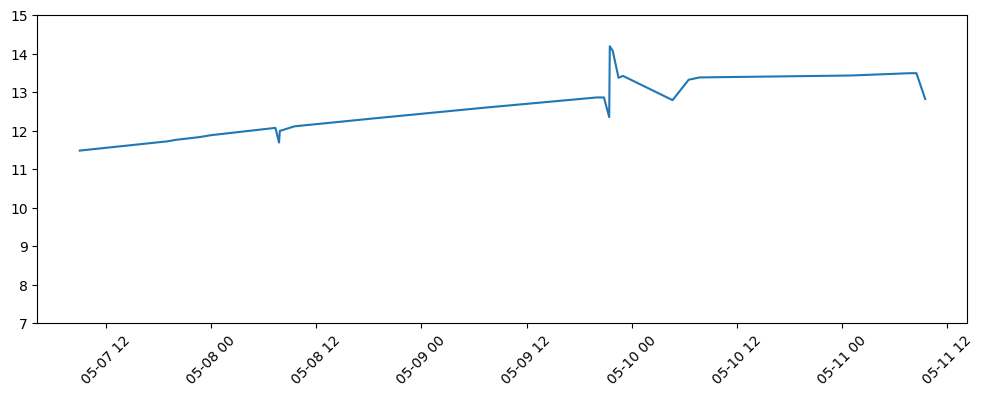

In [41]:
time = ['09:00', '19:00', '20:00', '22:40','23:59']
datetime1 = ['2025-05-07 '+t for t in time]
voltage1 = [11.49, 11.73, 11.77, 11.84, 11.89]

time = ['07:20', '07:45', '07:50', '09:30','18:45']
datetime2 = ['2025-05-08 '+t for t in time]
voltage2 = [12.08, 11.70, 12.00, 12.12, 12.33]

time = ['07:00', '20:00', '20:50', '21:26']
datetime3 = ['2025-05-09 '+t for t in time]
voltage3 = [12.6, 12.87, 12.87, 12.36]

# Restart in Car mode
time = ['2025-05-09 21:30', '2025-05-09 21:50', '2025-05-09 22:30', '2025-05-09 23:00',
        '2025-05-10 04:40', '2025-05-10 06:30', '2025-05-10 07:45', 
        '2025-05-11 00:58', '2025-05-11 07:45', '2025-05-11 08:30', '2025-05-11 09:30']
datetime4 = time
voltage4 = [14.2, 14.08, 13.38, 13.43, 12.8, 13.33, 13.39, 13.44, 13.5, 13.5, 12.83]

datetime = [np.datetime64(x) for x in datetime1+datetime2+datetime3+datetime4] 
voltage = voltage1 + voltage2 + voltage3 + voltage4

plt.figure(figsize=[12,4])
plt.plot(datetime, voltage)
plt.ylim(7, 15)
plt.xticks(rotation = 45);

Events: 

- 07.05.2025 09:00 - started at Small battery mode mode

- 08.05.2025 16:30 - move to Step 3

- 09.05.2025 20:00 - in Step 7

- 09.05.2025 20:49 - stopped charging for 50 min

- 09.05.2025 21:30 - restarted at Car mode, start at Step 4, at 21:50 still in Step 4, 22:30 - in step 6

- 10.05.2025 04:40 - in step 7

- 11.05.2025 08:30 - charging stopped
